PROJECT SUBMISSION BY: SUJATHA PATEL

In [ ]:
# Thera Bank Personal Loan Campaign
Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), 
the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last 
personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that 
was offered to them in the earlier campaign.

Domain:
Banking
Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.
Attribute Information:
 - ID: Customer ID
 - Age: Customer's age in completed years
 - Experience: #years of professional experience
 - Income: Annual income of the customer ($000)
 - ZIP Code: Home Address ZIP code.
 - Family: Family size of the customer
 - CCAvg: Avg. spending on credit cards per month ($000)
 - Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 - Mortgage: Value of house mortgage if any. ($000)
 - Personal Loan: Did this customer accept the personal loan offered in the last campaign?
 - Securities Account: Does the customer have a securities account with the bank?
 - CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
 - Online: Does the customer use internet banking facilities?
 - Credit card: Does the customer use a credit card issued by the bank?

Learning Outcomes:
 - Exploratory Data Analysis
 - Preparing the data to train a model
 - Training and making predictions using a classification model
 - Model evaluation

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.
Steps and tasks:

1. Import the datasets(1.1) and libraries(1.2), check datatype(1.3), statistical summary(1.4), shape(1.5), null values(1.6) or incorrect imputation(1.7). (5 marks)

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
 - Number of unique in each column? (2.1)
 - Number of people with zero mortgage? (2.2)
 - Number of people with zero credit card spending per month? (2.3)
 - Value counts of all categorical columns. (2.4)
 - Univariate and Bivariate (2.5)
 - Get data model ready (2.6) 

3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

4. Use Logistic Regression model to predict the number of a customers buying personal loans. 
Print all the metrics related for evaluating the model performance (15 marks)

5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter

6. Give Business understanding of your model? (5 marks)

In [1]:
## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks) 

### 1.1 Import Libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import RFE
from sklearn import metrics #calculate accuracy measures and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
from scipy import stats
from scipy.stats import zscore
import statsmodels.api as sm

#Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

# Update default style and size of charts
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

# Increase max number of rows and columns to display in pandas tables
pd.set_option('display.max_columns', 500)           
pd.set_option('display.max_rows', 500) 

### 1.2 Import Dataset 

In [4]:
# read the csv file into a dataframe
bank_original =pd.read_csv("Bank_Personal_Loan_Modelling.csv")
bank = bank_original

### 1.3 Check DataTypes

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Cleaning the column names
bank.rename(columns=lambda x: x.replace(' ', ''),inplace=True)
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
#Move Personal Loan is our dependent column. Hence moving it to the end.
bank = bank[[i for i in bank if i not in ['PersonalLoan']] + ['PersonalLoan']]
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   SecuritiesAccount  5000 non-null   int64  
 10  CDAccount          5000 non-null   int64  
 11  Online             5000 non-null   int64  
 12  CreditCard         5000 non-null   int64  
 13  PersonalLoan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### 1.4 Statistical Summary

In [8]:
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
ZIPCode,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
SecuritiesAccount,"5,000.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00


### Statistical Data Observation:

#### i. The Age and Expereince data close to normal distribution and they both follow same pattern.

#### ii. The Income data is right skewed.  We may need to look at the outliers and its impact on the dependent variable.  If excluding the outliers result in loss of rows/records that represent people who have taken personal loan (the dependent variable), this would weaken the classification power of the model.  We may need to try if a transformation is going to help us in this regard.

#### iii. The trend for cc average also follows the same pattern as Income variable.  We should try and explore to whether any transformation would help in converting the variable to a normally distributed form.

#### iv. Mortgage has a median of 0 and mean of 56.50 with a standard deviation of 101.71.  This implies that there is a significant right skew in this variable and we need to see the right way to transform this variable.






#### v. Check for Missing Values - Experience has got -ve values.  We need to check if there are any other variables that have missing/incorrect values


### 1.5 Shape

In [9]:
bank.shape  #denotes 5000 rows and 14 columns

(5000, 14)

### 1.6 Null Values

In [10]:
#Checking NULL Values
print("IS NULL?\n",bank.isna().sum())

IS NULL?
 ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
PersonalLoan         0
dtype: int64


### 1.7 Incorrect Imputation 
In statistics, imputation is the process of replacing missing data with substituted values. ... 

In [11]:
#Check if any of the column has any non-numeric value 
bank[~bank.applymap(np.isreal).all(1)] 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan


In [12]:
#ZIP Code Record Extreme Values 
bank[bank['ZIPCode']<90000] 

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
384,385,51,25,21,9307,4,0.60,3,0,0,0,1,1,0


In [13]:
# Replacing the incorrect ZIPCode with the ZIPCode's median value as the mean may give the decimal which may not be 
# the appropriate ZIPCode.
bank.loc[(bank['ZIPCode']<90000),'ZIPCode'] = bank['ZIPCode'].median()
print("Checking the Incorrect ZIPCode After update\n")
bank[bank['ID'] == 385]

Checking the Incorrect ZIPCode After update



,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
384,385,51,25,21,"93,437.00",4,0.60,3,0,0,0,1,1,0


In [14]:
# List the no. of people having -ve Expereince
bank[bank.Experience <0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
89,90,25,-1,113,"94,303.00",4,2.30,3,0,0,0,0,1,0
226,227,24,-1,39,"94,085.00",2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,"90,630.00",3,0.30,3,0,0,0,1,0,0
451,452,28,-2,48,"94,132.00",2,1.75,3,89,0,0,1,0,0
524,525,24,-1,75,"93,014.00",4,0.20,1,0,0,0,1,0,0
536,537,25,-1,43,"92,173.00",3,2.40,2,176,0,0,1,0,0
540,541,25,-1,109,"94,010.00",4,2.30,3,314,0,0,1,0,0
576,577,25,-1,48,"92,870.00",3,0.30,3,0,0,0,0,1,0
583,584,24,-1,38,"95,045.00",2,1.70,2,0,0,0,1,0,0
597,598,24,-2,125,"92,835.00",2,7.20,1,0,1,0,0,1,0


In [15]:
# No.of People having -ve Experience by Age
bank[bank['Experience'] < 0].groupby('Age')['Experience'].count()

Age
23    12
24    17
25    18
26     1
28     1
29     3
Name: Experience, dtype: int64

In [16]:
# We do not consider as only a data entry error with replacing as positive values as the age 23 shows having 
# experience as -3 years which may be incorrect data if we just convert to positive 3 years as the median for
# even age 24 is 0. 

# Hence, my proposal to replace with the Median of Expereince by Age (exclusing negative to get the more accurate value)
bank[(bank['Experience'] >=0) & (bank['Age']<=29)].groupby('Age')['Experience'].median()

Age
24    0
25    1
26    1
27    2
28    3
29    4
Name: Experience, dtype: int64

In [17]:
# Check further why the Age group 23 is not in the above results to see whether all expereinces are in negative
bank[(bank['Experience'] != 0) & (bank['Age'] == 23)]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
670,671,23,-1,61,"92,374.00",4,2.60,1,239,0,0,1,0,0
909,910,23,-1,149,"91,709.00",1,6.33,1,305,0,0,0,1,0
2430,2431,23,-1,73,"92,120.00",4,2.60,1,0,0,0,1,0,0
2618,2619,23,-3,55,"92,704.00",3,2.40,2,145,0,0,1,0,0
2717,2718,23,-2,45,"95,422.00",4,0.60,2,0,0,0,1,1,0
2962,2963,23,-2,81,"91,711.00",2,1.80,2,0,0,0,0,0,0
3130,3131,23,-2,82,"92,152.00",2,1.80,2,0,1,0,0,1,0
3157,3158,23,-1,13,"94,720.00",4,1.00,1,84,0,0,1,0,0
3425,3426,23,-1,12,"91,605.00",4,1.00,1,90,0,0,1,0,0
3824,3825,23,-1,12,"95,064.00",4,1.00,1,0,1,0,0,1,0


In [18]:
## Since the age 29 shows -1 and age 24 shows -3, it may not be appropriate to replace it as positive value.
## Hence, it will be resonably valid to replace with the Median of Experience with its corresponding Age 
## (exclude the errorneous experience in negative)


# All the expereinces of Age group 23 is in negative and median will be "nan" for Experience >= 0. Hence, assigning 
# the expereince as 0 for Age 23 explicitly
bank.loc[(bank['Experience']<0) & (bank['Age'] == 23),'Experience'] = 0

# From age 24 to29, we obtain the median of experience by age and assign to the negative experiences of the same age
for i in range(24,30):  # Age 24 to 29
    bank.loc[(bank['Experience']<0) & (bank['Age'] == i),'Experience'] = bank[(bank['Experience']>=0) & (bank['Age'] == i)]['Experience'].median()   

print("Post Validation: any -ve Expereinces?")
bank[bank['Experience'] < 0]
     

Post Validation: any -ve Expereinces?


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan


In [19]:
# Checking -ve Experiences update by the median of its corresponding age - sample check
print("Post Validation - Checking the experience based on sample IDs picked from the affected -ve Experiences")
bank[(bank['ID'] == 90) | (bank['ID'] == 316) | (bank['ID'] == 910) |  (bank['ID']==3077) | (bank['ID'] == 3280)]

Post Validation - Checking the experience based on sample IDs picked from the affected -ve Experiences


,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
89,90,25,1.00,113,"94,303.00",4,2.30,3,0,0,0,0,1,0
315,316,24,0.00,51,"90,630.00",3,0.30,3,0,0,0,1,0,0
909,910,23,0.00,149,"91,709.00",1,6.33,1,305,0,0,0,1,0
3076,3077,29,4.00,62,"92,672.00",2,1.75,3,0,0,0,0,1,0
3279,3280,26,1.00,44,"94,901.00",1,2.00,2,0,0,0,0,0,0


## 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)


### 2.1) Number of unique in each column 


In [20]:
#Printing unique values for each column
for i in bank.columns:
    print(i," :", bank[i].nunique())     # to show the unique vlaues - np.unique(bank[i]))
    

ID  : 5000
Age  : 45
Experience  : 44
Income  : 162
ZIPCode  : 466
Family  : 4
CCAvg  : 108
Education  : 3
Mortgage  : 347
SecuritiesAccount  : 2
CDAccount  : 2
Online  : 2
CreditCard  : 2
PersonalLoan  : 2


### 2.2) Number of people with zero mortgage? Ans: 3462 rows with zero Mortgage

In [21]:
bank[bank['Mortgage']==0]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard,PersonalLoan
0,1,25,1.00,49,"91,107.00",4,1.60,1,0,1,0,0,0,0
1,2,45,19.00,34,"90,089.00",3,1.50,1,0,1,0,0,0,0
2,3,39,15.00,11,"94,720.00",1,1.00,1,0,0,0,0,0,0
3,4,35,9.00,100,"94,112.00",1,2.70,2,0,0,0,0,0,0
4,5,35,8.00,45,"91,330.00",4,1.00,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,64,40.00,75,"94,588.00",3,2.00,3,0,0,0,1,0,0
4995,4996,29,3.00,40,"92,697.00",1,1.90,3,0,0,0,1,0,0
4997,4998,63,39.00,24,"93,023.00",2,0.30,3,0,0,0,0,0,0
4998,4999,65,40.00,49,"90,034.00",3,0.50,2,0,0,0,1,0,0


### 2.3) Number of people with zero credit card spending per month? 
#### ANS: CCAvg denotes the average creding card spending per month
####          Overall 106 people with Zero Credit Card spending per month
####          78 from Credit Cards with NOT USED status 
####          28 from Credit cards with USED Status 

In [22]:
bank1 = bank[bank['CCAvg'] == 0]
bank1.groupby('CreditCard')['CCAvg'].count().reset_index()

,CreditCard,CCAvg
0,0,78
1,1,28


### 2.4) Value counts of all categorical columns.

In [23]:
bank_x = bank[['Education','Family','Online','CreditCard',
               'SecuritiesAccount','CDAccount','PersonalLoan']] 

for i in bank_x.columns:
   print("Value_Counts: ",i,"\n",bank_x[i].value_counts(),"\n")

Value_Counts:  Education 
 1    2096
3    1501
2    1403
Name: Education, dtype: int64 

Value_Counts:  Family 
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64 

Value_Counts:  Online 
 1    2984
0    2016
Name: Online, dtype: int64 

Value_Counts:  CreditCard 
 0    3530
1    1470
Name: CreditCard, dtype: int64 

Value_Counts:  SecuritiesAccount 
 0    4478
1     522
Name: SecuritiesAccount, dtype: int64 

Value_Counts:  CDAccount 
 0    4698
1     302
Name: CDAccount, dtype: int64 

Value_Counts:  PersonalLoan 
 0    4520
1     480
Name: PersonalLoan, dtype: int64 



### 2.5) UNIVARIATE & BIVARIATE

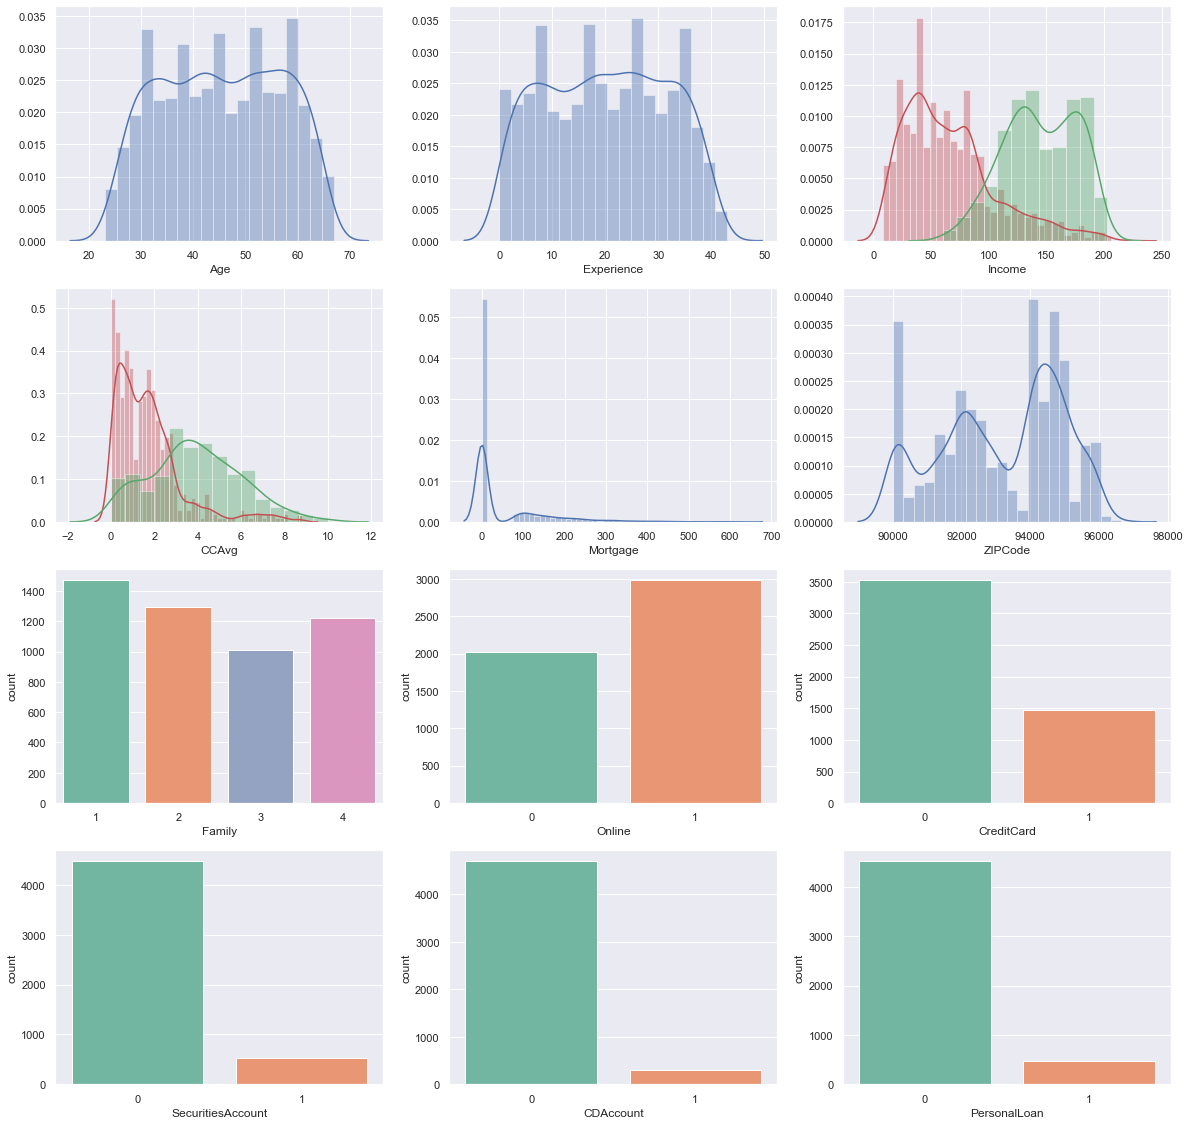

In [24]:
#Univariate Analysis - before removing outliers
plt.figure(figsize=(20,25))
sns.set(color_codes=True)

#Histogram
bank_x = bank[['Age','Experience','Income','CCAvg','Mortgage','ZIPCode']]
k = 0
for i in bank_x.columns:
    k = k + 1
    plt.subplot(5,3,k)
    if (i == "CCAvg") | (i == "Income"):
        sns.distplot(bank_x[bank.PersonalLoan == 0][i], color = 'r')
        sns.distplot(bank_x[bank.PersonalLoan == 1][i], color = 'g')
    else:
        sns.distplot(bank_x[i], kde = True)

#CountPlot
bank_x = bank[['Family','Online','CreditCard','SecuritiesAccount','CDAccount','PersonalLoan']]
for i in bank_x.columns:
    k = k + 1
    plt.subplot(5,3,k)
    sns.countplot(x=i,  data=bank_x, palette="Set2")
    
plt.show()

## My Observation:
### i. Age and Experience are close to normal distribution as much as possible.
### ii. CCAvg, Income and Mortgage variables seem to be right skewed. 
###     Therefore it makes sense to apply a logarthmic / square root / cubic root or 1/x transformation to these variables to ensure that they align to or follow normal distribution.

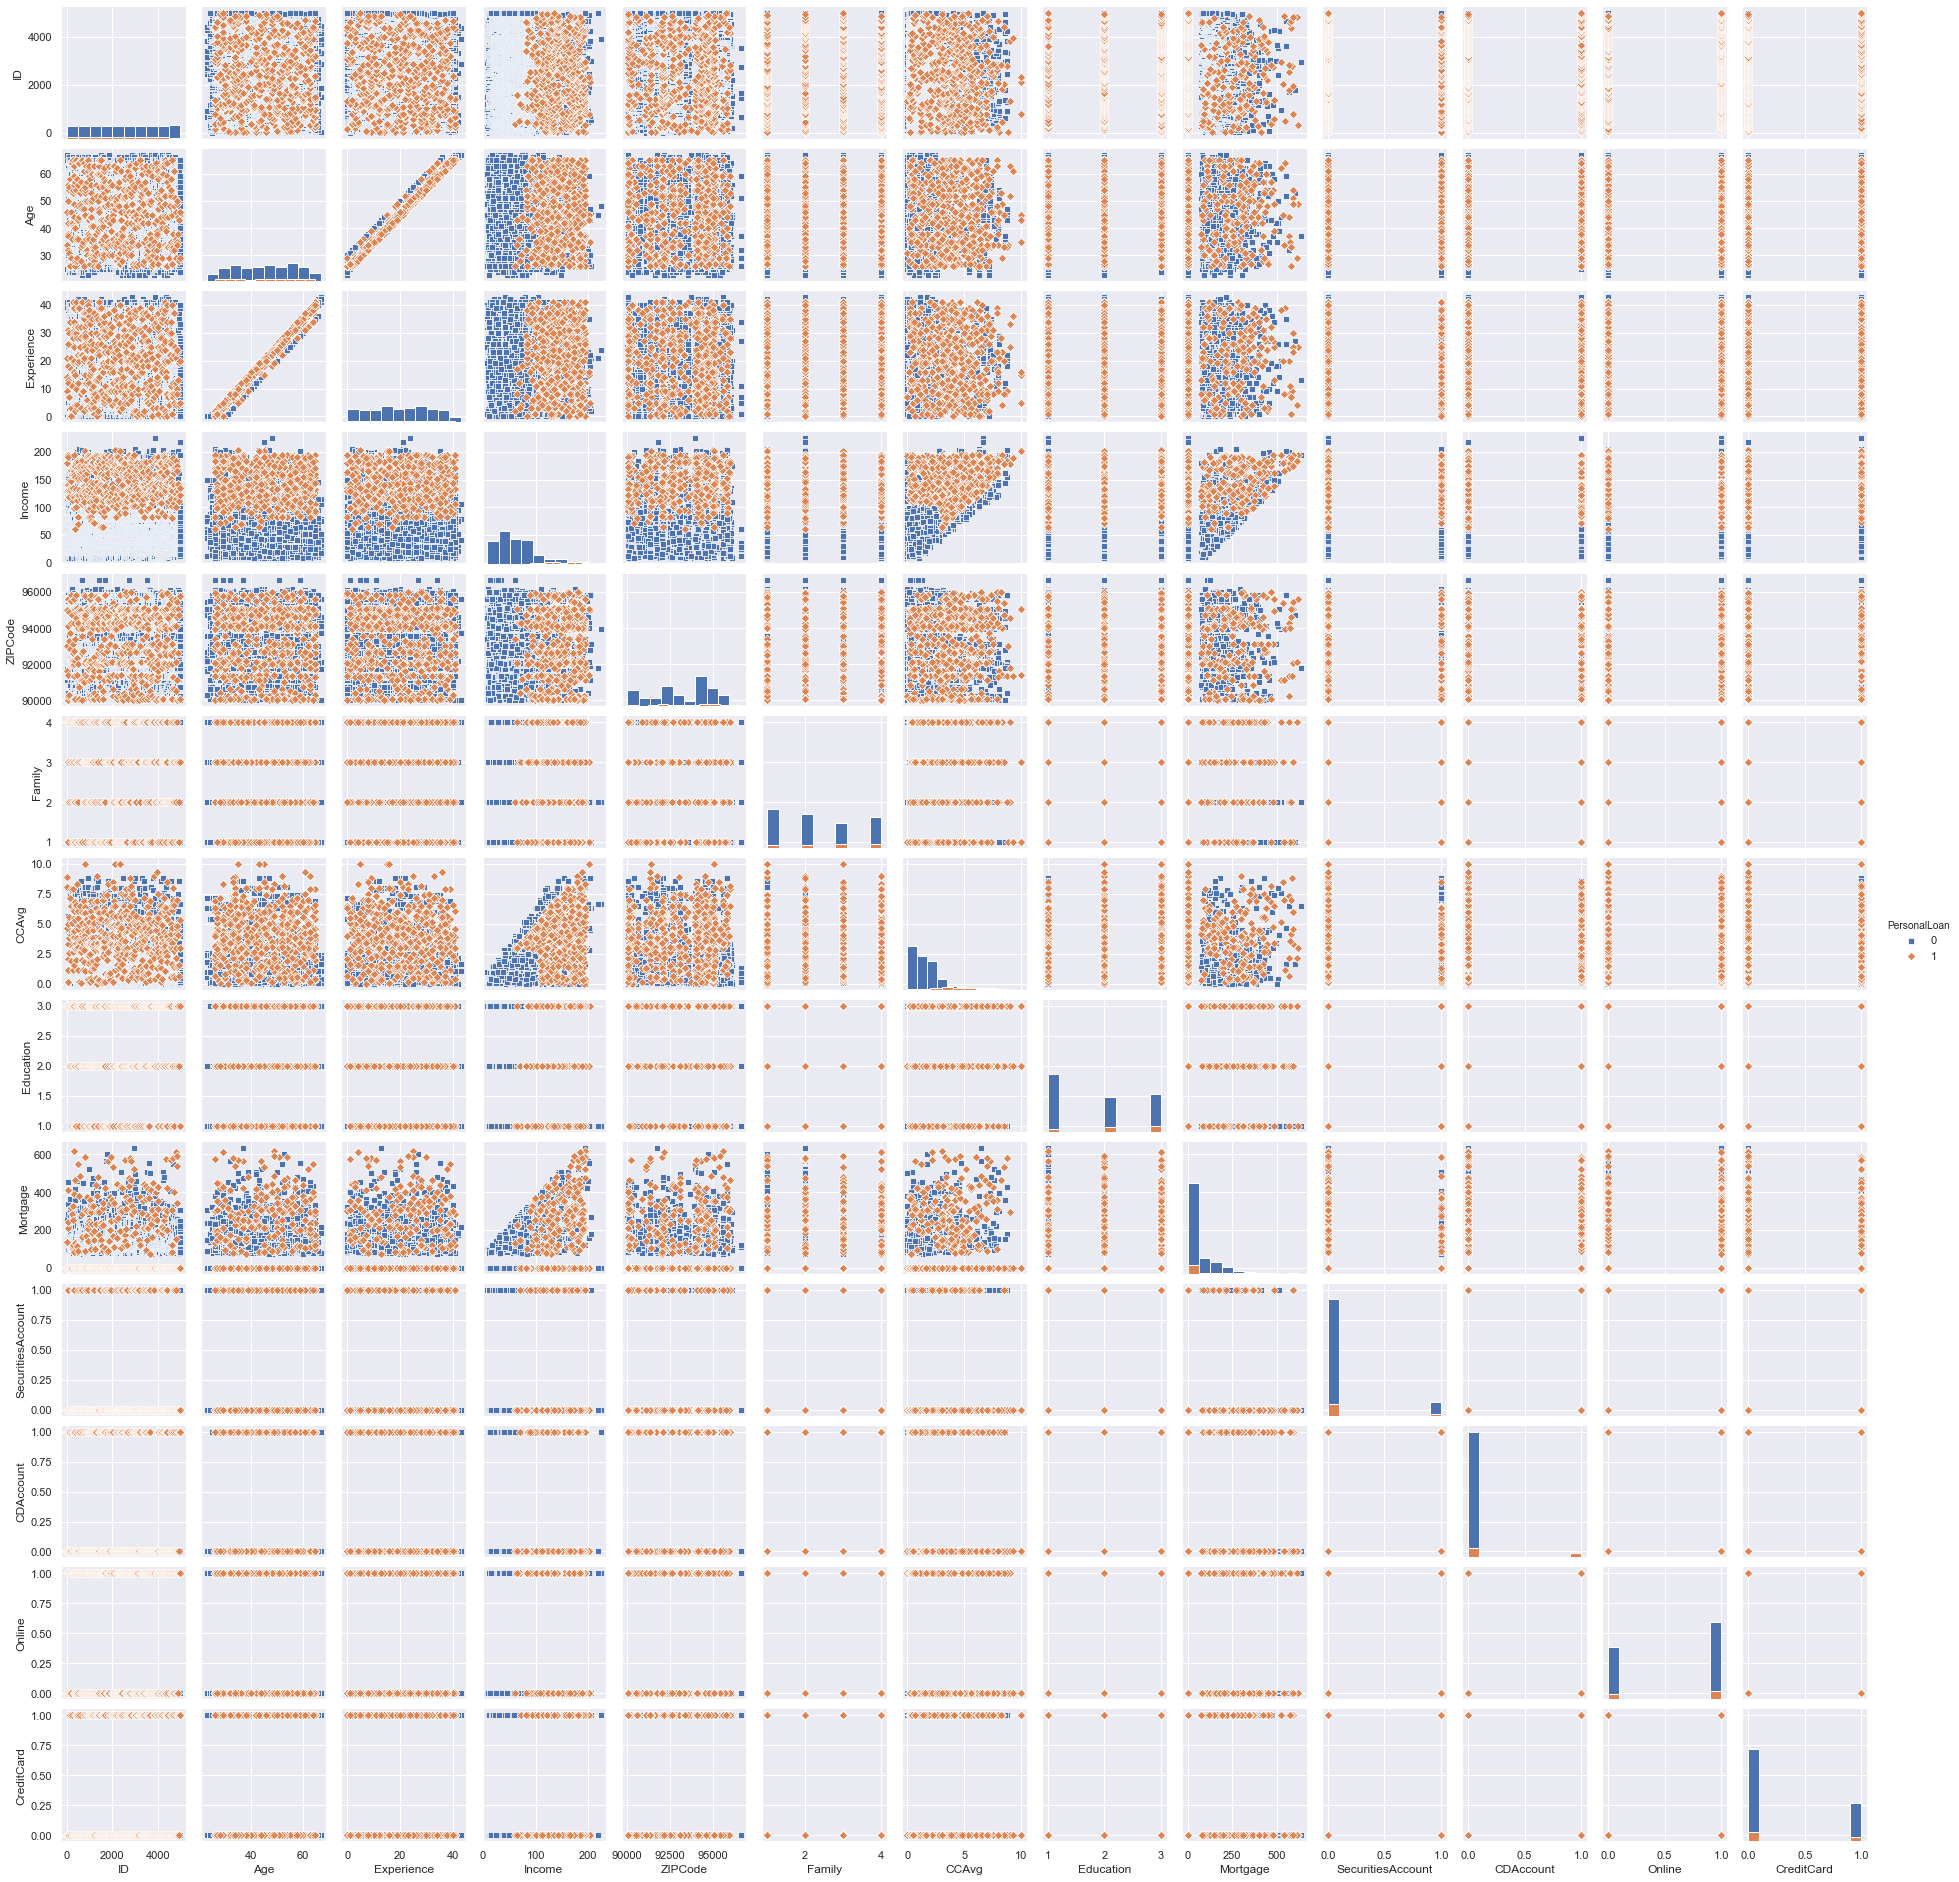

In [25]:
# Bivariate Analysis  - Before removing outliers
sns.pairplot(bank, diag_kind='hist',hue='PersonalLoan', markers=["s", "D"], size=2)

In [26]:
bank_stage0 = bank.copy() #keep the copy in order to revert to original dataset just before 2.6
bank_stage0.groupby('PersonalLoan').count()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,SecuritiesAccount,CDAccount,Online,CreditCard
PersonalLoan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


### 2.6 Get Data Model Ready

In [27]:
bank = bank_stage0.copy() # this step just to avoid starting from step1, as we can try to start from here conduct many trials on the data model

#### Variable Transformation - Outlier 

In [28]:
# For each predictors find outliers using mathematical function.

print("No. of Outliers vs Non-Outliers for each column\n")
def find_outlier(df_in, col_name):
    q25 = df_in[col_name].quantile(0.25)
    q75 = df_in[col_name].quantile(0.75)
    iqr = q75-q25 #Interquartile range
    lower, upper  = q25-1.5*iqr, q75+1.5*iqr
    outliers_df = df_in[(df_in[col_name] < lower) | (df_in[col_name] > upper)]
    outliers_removed_df = df_in[(df_in[col_name] >= lower) & (df_in[col_name] <= upper)]
    
    print(' \'{}\': {} /{}'.format(
        col_name, outliers_df.shape[0], outliers_removed_df.shape[0]))

for feature in bank.columns:
    find_outlier(bank, feature)

No. of Outliers vs Non-Outliers for each column

 'ID': 0 /5000
 'Age': 0 /5000
 'Experience': 0 /5000
 'Income': 96 /4904
 'ZIPCode': 0 /5000
 'Family': 0 /5000
 'CCAvg': 324 /4676
 'Education': 0 /5000
 'Mortgage': 291 /4709
 'SecuritiesAccount': 522 /4478
 'CDAccount': 302 /4698
 'Online': 0 /5000
 'CreditCard': 0 /5000
 'PersonalLoan': 480 /4520


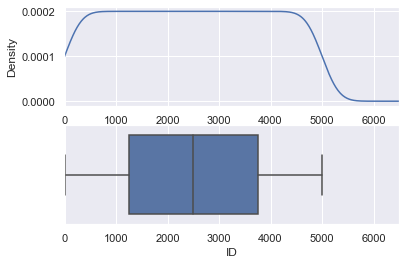

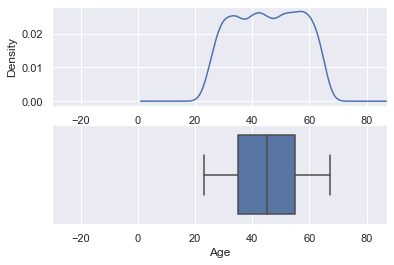

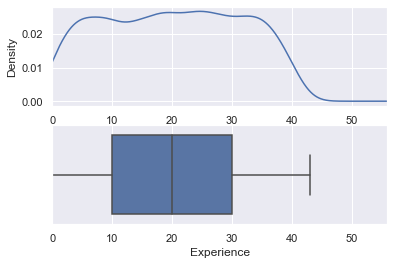

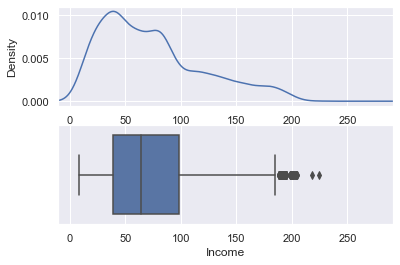

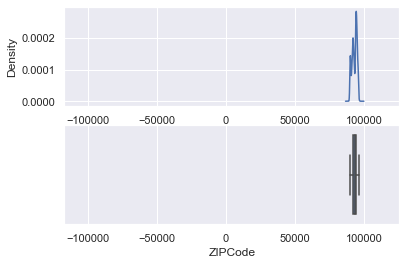

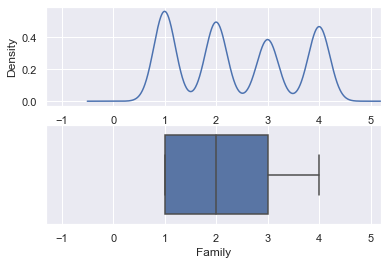

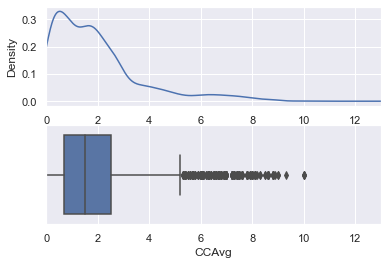

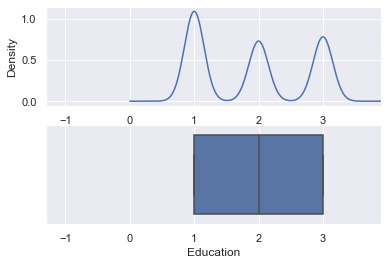

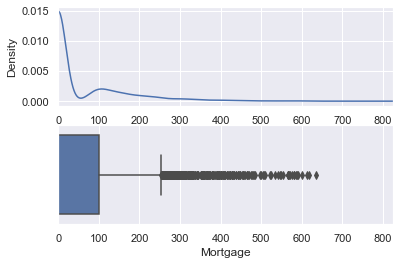

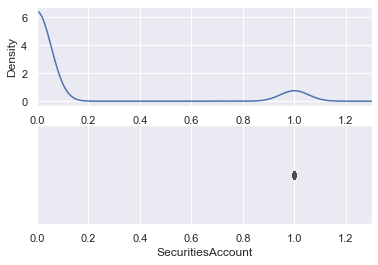

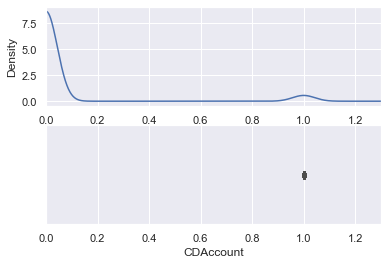

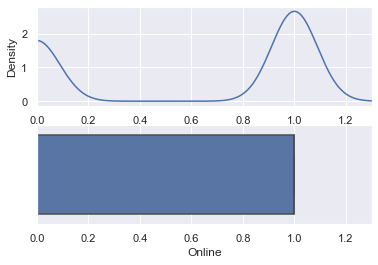

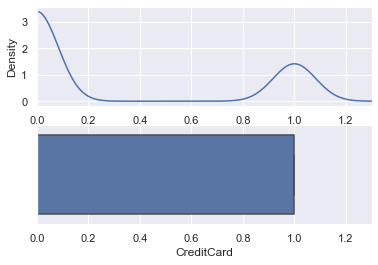

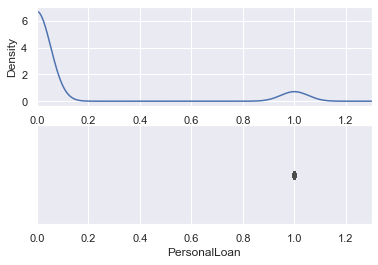

In [29]:
# For each predictors find outliers using visualization (boxplot) and the distrubution plot (look for skewness)

def plot_outliers(df_in,col_name):
    plt.figure(figsize=(6,4))
    plt.subplot(211)
    plt.xlim(df_in[col_name].min()*-1.3, df_in[col_name].max()*1.3)
 
    ax = df_in[col_name].plot(kind='kde')
 
    plt.subplot(212)
    plt.xlim(df_in[col_name].min()*-1.3, df_in[col_name].max()*1.3)
    sns.boxplot(x=df_in[col_name])
    
for feature in bank.columns:
    plot_outliers(bank, feature)

####  For both Income and CCAvg - There are outliers at the right end of the distribution with majority of the data concentrated on the left side. After trying out logarthmic, square root and  cube root transformations, the square root transformation makes the distribution follow a closer to normal distribution curve as shown below.

#### However, for Mortgage variable has a very different distribution. Around 69% of the data do not have a mortgage and the remaining 31% have a mortgage of varying degree.  Given this skewness, we would not be able to find mean or median for this data as it won't be meaningful.  A better approach for this would be to convert this variable into a binary variable with two values: 0 indicates 'No Mortgage' and 1 indicates 'Mortgage'.
#### As the below data shows, a cross tab between 'personal loan' and 'mortgage' shows that people who have a mortgage are less likely to have a personal loan (just 168) and those who don't have a mortgage are more likely to have a personal loan (312).


In [30]:
bank['Mortgage1'] = np.where(bank['Mortgage'] > 0, 1, 0)
pd.crosstab(index=bank["Mortgage1"], columns=bank["PersonalLoan"])

PersonalLoan,0,1
Mortgage1,,
0,3150,312
1,1370,168


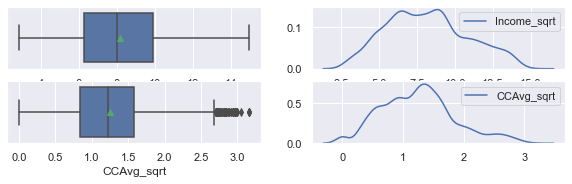

In [31]:
# Converting Income and CCAvg to sqrt value
bank['Income_sqrt'] = np.sqrt(bank['Income'])
bank['CCAvg_sqrt'] = np.sqrt(bank['CCAvg'])    
plt.subplot(6,2,1)
sns.boxplot(bank['Income_sqrt'], showmeans=True)
plt.subplot(6,2,2)
sns.kdeplot(bank['Income_sqrt'])
plt.subplot(6,2,3)
sns.boxplot(bank['CCAvg_sqrt'], showmeans=True)
plt.subplot(6,2,4)
sns.kdeplot(bank['CCAvg_sqrt'])

In [32]:
bank.drop('Income',axis=1,inplace=True) # Drop Income variable as we will be using Income_cbrt 
bank.drop('CCAvg',axis=1,inplace=True) # Drop CCAvg variable as we will be using CCAvg_cbrt 
bank.drop('Mortgage',axis=1,inplace=True) # Drop Mortgage variable a we will be using the Mortgage1 as category
bank.drop("ZIPCode",axis=1,inplace=True) # Drop ZIPCode as no correlation to target variable

### Using Chi-square test we are finding whether the categorical variables 'Family', 'Mortgage1', Education', 'CreditCard', 'Securities Account', 'CD Account', 'Online', 'Personal Loan' influence the dependent variable "Personal Loan"

In [33]:
bank_c = bank[['Family','Mortgage1','Education', 'CreditCard', 'SecuritiesAccount', 'CDAccount', 'Online', 'PersonalLoan']]

In [34]:
#The bank data composite of continuous and categorical variables. 
#Specifically categorical variables are: Family members (1 to 4), Education (1 to 3), Personal Loan (0 or 1), Securities Account (0 or 1), 
#CD Account (0 or 1), Online (0 or 1), CreditCard (0 or 1), Mortgage1(0 or 1). 

CategoryColumns = [['Family','Mortgage1','Education','SecuritiesAccount','CDAccount','Online','CreditCard','PersonalLoan']]
for i in CategoryColumns:
    bank_c[i] = bank_c[i].astype('category')

bank_c['Education']         = bank_c['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
bank_c['SecuritiesAccount'] = bank_c['SecuritiesAccount'].replace({0: 'No', 1: 'Yes'})
bank_c['CDAccount']         = bank_c['CDAccount'].replace({0: 'NoCertificate', 1: 'Certificate'})
bank_c['Online']            = bank_c['Online'].replace({0: 'NoUsage', 1: 'Usage'})
bank_c['CreditCard']        = bank_c['CreditCard'].replace({0: 'NotUsed', 1: 'Used'})
bank_c['Mortgage1']         = bank_c['Mortgage1'].replace({0:'No', 1: 'Yes'}) 
bank_c['PersonalLoan']      = bank_c['PersonalLoan'].replace({0: 'Rejected',1: 'Accepted'})

bank_c.describe()

,Family,Mortgage1,Education,CreditCard,SecuritiesAccount,CDAccount,Online,PersonalLoan
count,5000,5000,5000,5000,5000,5000,5000,5000
unique,4,2,3,2,2,2,2,2
top,1,No,Undergrad,NotUsed,No,NoCertificate,Usage,Rejected
freq,1472,3462,2096,3530,4478,4698,2984,4520


##### Family Chi-Square Results - Since p < 0.05, Family and Personal Loan is dependent we can keep this column

In [35]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["Family"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(29.676116414854746,
 1.6144121228248757e-06,
 3,
 array([[ 141.312, 1330.688],
        [ 124.416, 1171.584],
        [  96.96 ,  913.04 ],
        [ 117.312, 1104.688]]))

#### Mortgage1 Chi-Square Results - Since p < 0.05, Mortgage1 and Personal Loan is dependent we can keep this column

In [36]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["Mortgage1"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(4.2643758468264625,
 0.0389195445526001,
 1,
 array([[ 332.352, 3129.648],
        [ 147.648, 1390.352]]))

#### Education Chi-Square Results - Since p < 0.05, Education and Personal Loan is dependent we can keep this column

In [37]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["Education"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(111.23987187389132,
 6.991473868665376e-25,
 2,
 array([[ 144.096, 1356.904],
        [ 134.688, 1268.312],
        [ 201.216, 1894.784]]))

#### CreditCard Chi-Square Results - Since p > 0.05 CreditCard Account and Personal Loan is independant and we can drop the records as this doesn't influence the outcome

In [38]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["CreditCard"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(0.021144453920855056,
 0.8843861223314504,
 1,
 array([[ 338.88, 3191.12],
        [ 141.12, 1328.88]]))

#### Securities Account Chi-Square Results - Since p > 0.05 Securities Account and Personal Loan is independant and we can drop the records as this doesn't influence the outcome

In [39]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["SecuritiesAccount"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(2.172310545186504,
 0.14051497326319357,
 1,
 array([[ 429.888, 4048.112],
        [  50.112,  471.888]]))

#### CD Account Chi-Square Results - Since p < 0.05 CD Account and Personal Loan is dependant we can keep this column

In [40]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["CDAccount"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(495.9042421878233,
 7.398297503330058e-110,
 1,
 array([[  28.992,  273.008],
        [ 451.008, 4246.992]]))

#### Online Account Chi-Square Results - Since p > 0.05 Online Account and Personal Loan is independant and we can drop the records as this doesn't influence the outcome

In [41]:
from scipy.stats import chisquare,chi2_contingency
cont = pd.crosstab(bank_c["Online"],
                   bank_c["PersonalLoan"])
chi2_contingency(cont)

(0.1560067212052492,
 0.6928599643141485,
 1,
 array([[ 193.536, 1822.464],
        [ 286.464, 2697.536]]))

In [42]:
#Based on the above chi-squre results, the following variables will be dropped
bank.drop("SecuritiesAccount",axis=1,inplace=True)
bank.drop("CreditCard",axis=1,inplace=True)
bank.drop("Online",axis=1,inplace=True)

#ID has one to one mapping and not add any value to the model, hence it will be dropped
bank.drop("ID",axis=1,inplace=True) 

In [43]:
# Removing the outliers using IQR 
# bank_stats : statistical summary bank dataframe
bank_stats = bank.describe().transpose()
bank_stats['IQR'] = bank_stats['75%'] - bank_stats['25%']
bank_stats['Left_Outlier'] = bank_stats['25%'] - (1.5*bank_stats['IQR'])
bank_stats['Right_Outlier'] = bank_stats['75%'] + (1.5*bank_stats['IQR'])
bank_stats

# Removing outliers using IQR   
bank_z = bank.drop(bank[
                          (bank['Income_sqrt'] < bank_stats.loc['Income_sqrt'].Left_Outlier) | 
                          (bank['Income_sqrt'] > bank_stats.loc['Income_sqrt'].Right_Outlier) | 
                          (bank['CCAvg_sqrt'] < bank_stats.loc['CCAvg_sqrt'].Left_Outlier) | 
                          (bank['CCAvg_sqrt'] > bank_stats.loc['CCAvg_sqrt'].Right_Outlier)].index)
bank_z.groupby('PersonalLoan').count()

,Age,Experience,Family,Education,CDAccount,Mortgage1,Income_sqrt,CCAvg_sqrt
PersonalLoan,,,,,,,,
0,4441,4441,4441,4441,4441,4441,4441,4441
1,451,451,451,451,451,451,451,451


In [44]:
# Checking the statistical once more after transformation
bank_z.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,"4,892.00",45.35,11.53,23.00,35.00,45.00,55.00,67.00
Experience,"4,892.00",20.13,11.49,0.00,10.00,20.00,30.00,43.00
Family,"4,892.00",2.41,1.15,1.00,1.00,2.00,3.00,4.00
Education,"4,892.00",1.89,0.84,1.00,1.00,2.00,3.00,3.00
CDAccount,"4,892.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00
PersonalLoan,"4,892.00",0.09,0.29,0.00,0.00,0.00,0.00,1.00
Mortgage1,"4,892.00",0.31,0.46,0.00,0.00,0.00,1.00,1.00
Income_sqrt,"4,892.00",8.07,2.60,2.83,6.16,7.94,9.64,14.97
CCAvg_sqrt,"4,892.00",1.22,0.57,0.00,0.84,1.22,1.58,2.68


In [45]:

bank_z.groupby('PersonalLoan').count()
##### we would have been letft with 451 records out of 485 records for people who have opted for personal loan.But after run through the model, its more suitable to consider without removing the outliers.

,Age,Experience,Family,Education,CDAccount,Mortgage1,Income_sqrt,CCAvg_sqrt
PersonalLoan,,,,,,,,
0,4441,4441,4441,4441,4441,4441,4441,4441
1,451,451,451,451,451,451,451,451


In [46]:

# Check for the distribution of the personal loan variable after cleanin the data to ensure that we have sufficient information available to build the model
pd.crosstab(bank_z['PersonalLoan'], columns="count")  # Make a crosstab columns="count")

col_0,count
PersonalLoan,
0,4441
1,451


In [47]:
#Convert X & Y variable to a categorical variable as relevant

#The bank data composite of continuous and categorical variables. 
#Specifically categorical variables are: Family members (1 to 4), Education (1 to 3), Personal Loan (0 or 1), Securities Account (0 or 1), 
#CD Account (0 or 1), Online (0 or 1), CreditCard (0 or 1). 

#Continuos variables are - ID, Age (in years), Experience (in years), Income ($000), Zip Code (treating as continous rather category), 
#CCAvg ($000), Mortgage ($000) 

CategoryColumns = [['Family','Education','CDAccount','Mortgage1']]
for i in CategoryColumns:
    bank_z[i] = bank_z[i].astype('category')
    
bank_z['Education']     = bank_z['Education'].replace({1: 'Undergrad', 2: 'Graduate', 3: 'Advanced/Professional'})
bank_z['CDAccount']     = bank_z['CDAccount'].replace({0: 'NoCertificate', 1: 'Certificate'})
bank_z['Mortgage1']     = bank_z['Mortgage1'].replace({0:'No', 1: 'Yes'}) 

bank_z = pd.get_dummies(bank_z, drop_first=True)

bank['PersonalLoan'] = bank['PersonalLoan'].astype('category')
bank_z.describe()

,Age,Experience,PersonalLoan,Income_sqrt,CCAvg_sqrt,Family_2,Family_3,Family_4,Education_Graduate,Education_Undergrad,CDAccount_NoCertificate,Mortgage1_Yes
count,"4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00","4,892.00"
mean,45.35,20.13,0.09,8.07,1.22,0.25,0.20,0.25,0.28,0.41,0.94,0.31
std,11.53,11.49,0.29,2.60,0.57,0.44,0.40,0.43,0.45,0.49,0.24,0.46
min,23.00,0.00,0.00,2.83,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,35.00,10.00,0.00,6.16,0.84,0.00,0.00,0.00,0.00,0.00,1.00,0.00
50%,45.00,20.00,0.00,7.94,1.22,0.00,0.00,0.00,0.00,0.00,1.00,0.00
75%,55.00,30.00,0.00,9.64,1.58,1.00,0.00,0.00,1.00,1.00,1.00,1.00
max,67.00,43.00,1.00,14.97,2.68,1.00,1.00,1.00,1.00,1.00,1.00,1.00


4892 4892


Age                       -0.01
Experience                -0.01
PersonalLoan               1.00
Income_sqrt                0.47
CCAvg_sqrt                 0.34
Family_2                  -0.02
Family_3                   0.05
Family_4                   0.02
Education_Graduate         0.07
Education_Undergrad       -0.14
CDAccount_NoCertificate   -0.32
Mortgage1_Yes              0.03
Name: PersonalLoan, dtype: float64

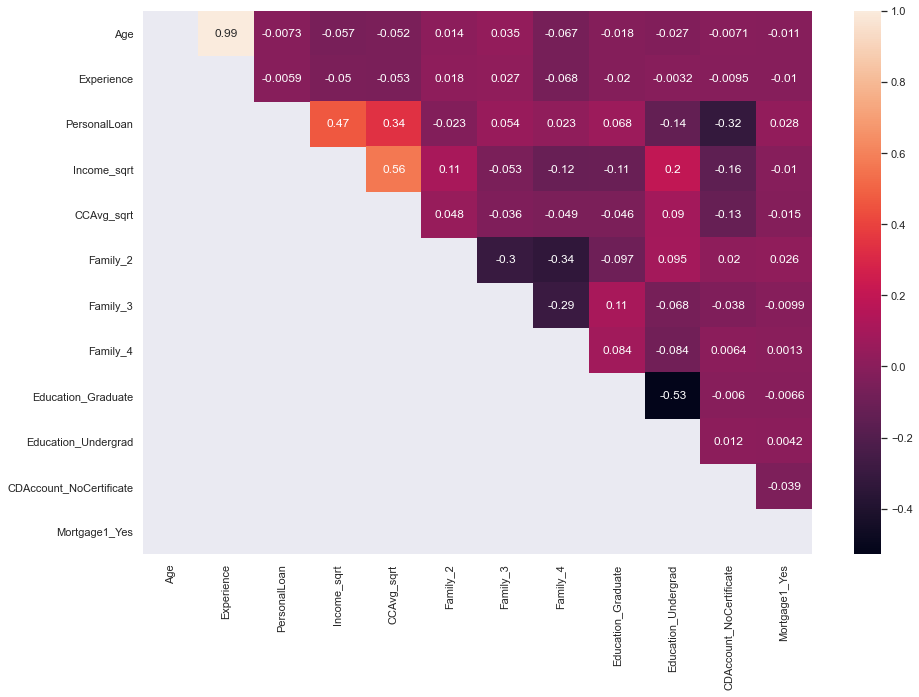

In [48]:
plt.subplots(figsize=(15,10))
bank_corr = bank_z.corr()
mask = np.zeros_like(bank_corr)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(bank_corr, xticklabels=bank_corr.columns.values, yticklabels=bank_corr.columns.values, annot=True, mask = mask)
bank_zcopy = bank_z.copy()
print(len(bank_z), len(bank_zcopy))
bank_zcopy[bank_z.columns[0:]].corr()['PersonalLoan'][:-1]
bank_z.corr()['PersonalLoan']

#### My Observation:

#### The correlation matrix above indicates that Age and Experience are highly correlated.  Therefore one of the two variables can be dropped from the model. 

#### Also, the correlation between dependent variable (Personal loan) and other independent variables indicate that Personalloan has considerable correlation (> 0.1) with Income_cbrt, CCAvg_cbrt, Education_Undergrad, CCAccount variables only.  Therefore, we would be using these 4 variables for building the model.


In [49]:
#Calculate baseline proportion - ratio of Yes to No             
pd.options.display.float_format = '{:,.3f}'.format        
prop_Y = bank_z['PersonalLoan'].value_counts(normalize=True)*100
print(prop_Y)
print("\n The outliers removed database is almost equal with the original proportion accepted was 9.6%")
pd.options.display.float_format = '{:,.2f}'.format        

0   90.781
1    9.219
Name: PersonalLoan, dtype: float64

 The outliers removed database is almost equal with the original proportion accepted was 9.6%


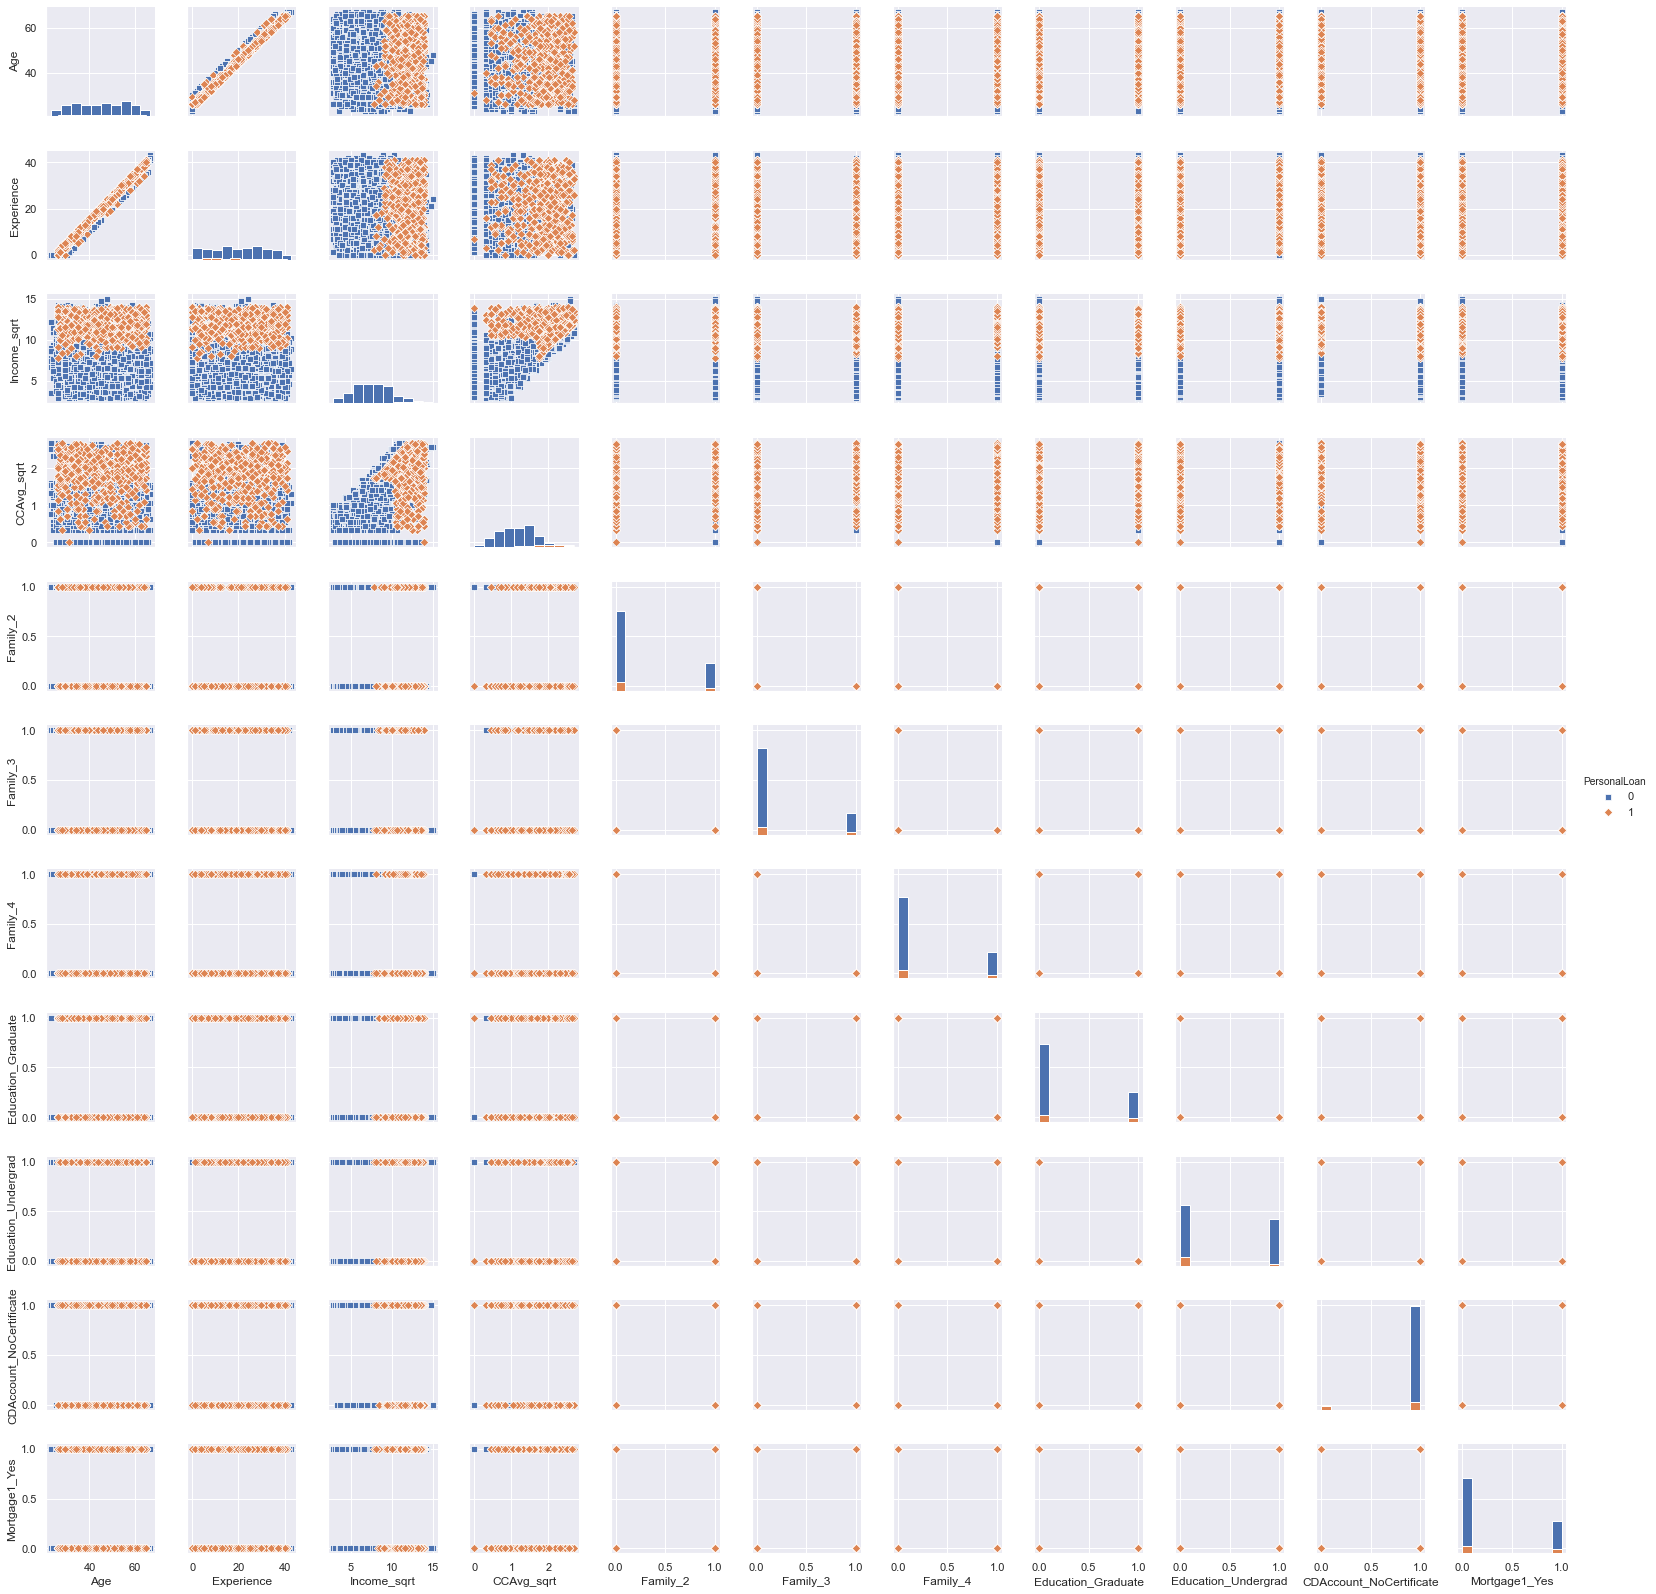

In [50]:
# Bivariate Analysis  - after removing outliers
#bank_a = bank.drop('ID',axis=1) #dropping ID for Bivariate as it does not add any value for the analysis
sns.pairplot(bank_z, diag_kind='hist',hue='PersonalLoan', markers=["s", "D"], size=2)

## 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [51]:
#### Correlation to check the strength of the relationship between all the variables
bank_z.corr(method='pearson')
print("Variables for which correlation with Perosnal Loan lies in the range -0.1 to 0.1")
print("********************************************************************************")
corr_matrix = bank_z.corr()
corr_value = corr_matrix.iloc[2,:] #PersonalLoan is at 2nd variable
for i in corr_value.index:
    if ((corr_value[i] >= -0.1) & (corr_value[i] <= 0.1)):
        print(i,corr_value[i])


Variables for which correlation with Perosnal Loan lies in the range -0.1 to 0.1
********************************************************************************
Age -0.007284584248189899
Experience -0.005881321933618133
Family_2 -0.022638197531782006
Family_3 0.053981417697020716
Family_4 0.023032265849740663
Education_Graduate 0.06822951876100454
Mortgage1_Yes 0.028383503848609454


In [52]:
print("Variables for which correlation with Personal Loan lies in the range -0.1 to 0.1 - DROPPED")
print("******************************************************************************************")
corr_matrix = bank_z.corr()
corr_value = corr_matrix.iloc[2,:] #Personalloan is at 2nd variable 
for i in corr_value.index:
    if ((corr_value[i] >= -0.1) & (corr_value[i] <= 0.1)):
        bank_z.drop(i,axis=1,inplace=True)
        print("Dropped ",i," with correlation of ",corr_value[i])

Variables for which correlation with Personal Loan lies in the range -0.1 to 0.1 - DROPPED
******************************************************************************************
Dropped  Age  with correlation of  -0.007284584248189899
Dropped  Experience  with correlation of  -0.005881321933618133
Dropped  Family_2  with correlation of  -0.022638197531782006
Dropped  Family_3  with correlation of  0.053981417697020716
Dropped  Family_4  with correlation of  0.023032265849740663
Dropped  Education_Graduate  with correlation of  0.06822951876100454
Dropped  Mortgage1_Yes  with correlation of  0.028383503848609454


In [53]:
# Checking correlation after dropping the variables for which correlation with Personal Loan lies in the range -0.1 to 0.1  
bank_z.corr()

,PersonalLoan,Income_sqrt,CCAvg_sqrt,Education_Undergrad,CDAccount_NoCertificate
PersonalLoan,1.00,0.47,0.34,-0.14,-0.32
Income_sqrt,0.47,1.00,0.56,0.20,-0.16
CCAvg_sqrt,0.34,0.56,1.00,0.09,-0.13
Education_Undergrad,-0.14,0.20,0.09,1.00,0.01
CDAccount_NoCertificate,-0.32,-0.16,-0.13,0.01,1.00


In [54]:
# Define X and Y Variables
bank_model_data = bank_z.loc[:,['Income_sqrt', 'CCAvg_sqrt','Education_Undergrad','CDAccount_NoCertificate','PersonalLoan']]
X = bank_model_data.drop('PersonalLoan',axis=1)
y = bank_model_data[['PersonalLoan']]

In [55]:
# Splittig 70:30 (train:test)
test_size = 0.30 
seed = 1  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print("Number of X_train data records is {}.\nNumber of X_test data records is {}.\nNumber of y_train records is {}.\nNumber of y_test records is {}.".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Number of X_train data records is (3424, 4).
Number of X_test data records is (1468, 4).
Number of y_train records is (3424, 1).
Number of y_test records is (1468, 1).


## 4. Use Logistic Regression model to predict the number of a customers buying personal loans. Print all the metrics related for evaluating the model performance (15 marks)

### (i) Model building using statsmodels.api

In [56]:
logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.117187
         Iterations 10


In [57]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary2())

                              Results: Logit
Model:                 Logit               Pseudo R-squared:    0.623      
Dependent Variable:    PersonalLoan        AIC:                 812.4938   
Date:                  2020-07-10 10:46    BIC:                 843.1866   
No. Observations:      3424                Log-Likelihood:      -401.25    
Df Model:              4                   LL-Null:             -1063.0    
Df Residuals:          3419                LLR p-value:         2.5709e-285
Converged:             1.0000              Scale:               1.0000     
No. Iterations:        10.0000                                             
---------------------------------------------------------------------------
                         Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
---------------------------------------------------------------------------
const                   -13.1683   0.7799 -16.8843 0.0000 -14.6969 -11.6397
Income_sqrt               1.2684   0.0757  

### Interpretation of Pseudo R^2

A pseudo R^2 of 62% indicates that 62% of the uncertainty of the intercept is explained by the full model

Calculate the odds ratio from the coef using the formula odds ratio=exp(coef)
Calculate the probability from the odds ratio using the formula probability = odds / (1+odds)

In [58]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [59]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Income_sqrt,1.27,3.56,0.78,0.00
CCAvg_sqrt,0.91,2.48,0.71,0.00
CDAccount_NoCertificate,-2.27,0.10,0.09,0.00
Education_Undergrad,-4.02,0.02,0.02,0.00
const,-13.17,0.00,0.00,0.00


##### Customers with higher Income have 78% probability of defaulting the loan 
##### Customers with higher Credit Spending potential hav 71% probability of defaulting the loan

## (ii) Model building using Logistic Regression from Sklearn

In [60]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    plt.figure(figsize=(3,3))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [61]:
# function to print the evaluation of model
def eval_model(X_train, X_test, y_train, y_test,model_name,title_name):
    y_predict = model.predict(X_test)
    train_score = model.score(X_train,y_train)
    test_score = model.score(X_test, y_test)
    
    print("************************ ",title_name, "**************************")
    print("\nTrain score of the model is "+'{:,.2f}'.format(train_score *100)+"%")
    print("Test score of the model is "+'{:,.2f}'.format(test_score *100)+"%")
    
    print(metrics.confusion_matrix(y_test, y_predict))

    print("\nAccuracy for ",model_name," "+'{:,.2f}'.format(accuracy_score(y_test, y_predict)*100)+"%")
    print("Trainig accuracy "+'{:,.2f}'.format(logreg.score(X_train,y_train)*100)+"%")  
    print("Testing accuracy "+'{:,.2f}'.format(logreg.score(X_test, y_test)*100)+"%")

    print('\nConfusion Matrix')
    print(draw_cm(y_test,y_predict),"\n")

    print("Recall "+'{:,.2f}'.format(recall_score(y_test,y_predict)*100)+"%")
    print("Precision "+'{:,.2f}'.format(precision_score(y_test,y_predict)*100)+"%")
    print("F1 Score "'{:,.2f}'.format(f1_score(y_test,y_predict)*100)+"%")
    print("Roc Auc Score "'{:,.2f}'.format(roc_auc_score(y_test,y_predict)*100)+"%")

In [62]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Number of X_train data records is (3424, 4) . Number of y_train records is (3424, 1) 
************************  MODEL 1 **************************

Train score of the model is 95.91%
Test score of the model is 96.12%
[[1328    9]
 [  48   83]]

Accuracy for  Logistic Regression Model  96.12%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


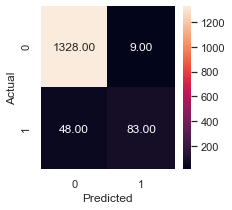

None 

Recall 63.36%
Precision 90.22%
F1 Score 74.44%
Roc Auc Score 81.34%


In [63]:
# Fit the model on 30%
print("Number of X_train data records is {} . Number of y_train records is {} ".format(X_train.shape, y_train.shape))
model = LogisticRegression()
model.fit(X_train, y_train)

eval_model(X_train,X_test,y_train,y_test,"Logistic Regression Model","MODEL 1")

In [64]:
### We have already calculated the classification accuracy (test score - 96.1% & train score - 95.9%), but as implance exist in the bank set (90.4% vs 9.6%), the classification accuracy is not a good evaluation matrix. 
### The Precision determines the accuracy of positive predictions. This model gives almost 90% accuracy of positive predictions.

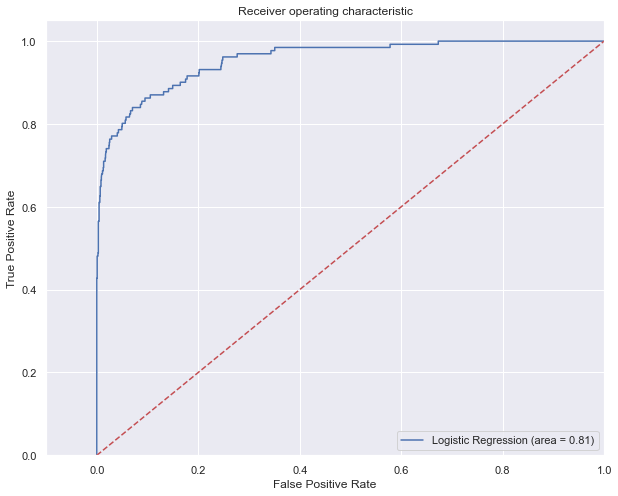

In [65]:
#AUC ROC curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.1, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5. Give your reasoning on how can the model perform better? (10 marks)
Hint: Check parameter 

### Checking Parameters of logistic regression

We will still explore to obtain the best precision with the help of changing the parameters in the below steps.

In [66]:
logreg.get_params() 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

sag/saga Solver has the highest accuracy:
************************  MODEL 2 **************************

Train score of the model is 95.91%
Test score of the model is 96.12%
[[1329    8]
 [  49   82]]

Accuracy for  sag  96.12%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


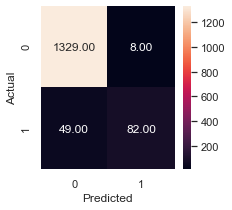

None 

Recall 62.60%
Precision 91.11%
F1 Score 74.21%
Roc Auc Score 81.00%

solver:  ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
train_score:  [0.959, 0.959, 0.957, 0.959, 0.959]
test_score:   [0.96, 0.96, 0.959, 0.961, 0.961]


In [67]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
k = 0
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 0.75,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)    
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    if (i == "sag"):
        print("sag/saga Solver has the highest accuracy:")
        eval_model(X_train,X_test,y_train,y_test,i,"MODEL 2")

print("\nsolver: ",solver)
print("train_score: ",train_score)
print("test_score:  ",test_score)

liblinear Solver has the highest accuracy:
************************  MODEL 3 **************************

Train score of the model is 95.97%
Test score of the model is 96.25%
[[1329    8]
 [  47   84]]

Accuracy for  liblinear  96.25%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


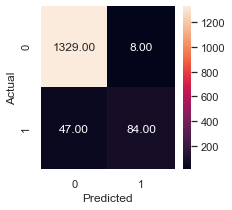

None 

Recall 64.12%
Precision 91.30%
F1 Score 75.34%
Roc Auc Score 81.76%

solver:  ['liblinear', 'saga']
train_score:  [0.96, 0.96]
test_score:  [0.963, 0.96]


In [68]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 0.75,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    if (i == "liblinear"):
        print("liblinear Solver has the highest accuracy:")
        eval_model(X_train,X_test,y_train,y_test,i,"MODEL 3")
    
print("\nsolver: ",solver)
print("train_score: ",train_score)
print("test_score: ",test_score)


**Accuracy is higher for  'l1' with 'liblinear' compared with 'l2' with 'sag/saga'.  The pricision is high and recall is improved and F1 Score as well. We will still fruther change the parameters to see whether we can get further improvement.**

L1 with liblinear and class_weight as balanced:
************************  MODEL 4 **************************

Train score of the model is 89.89%
Test score of the model is 90.05%
[[1205  132]
 [  14  117]]

Accuracy for  saga  90.05%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


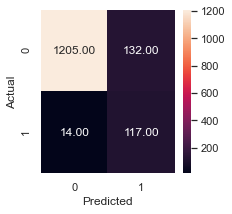

None 

Recall 89.31%
Precision 46.99%
F1 Score 61.58%
Roc Auc Score 89.72%


In [69]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced
model.fit(X_train, y_train) 
print("L1 with liblinear and class_weight as balanced:")
eval_model(X_train,X_test,y_train,y_test,i,"MODEL 4")

#### Training and Testing accruacy decreased and also Precision is only 46.99%. Precision to be high in order to minimize the errors in offering the loan to non-potential customers. Hence, this model will be dropped.

0.5 has the highest accuracy:
************************  MODEL 5 **************************

Train score of the model is 89.89%
Test score of the model is 90.05%
[[1204  133]
 [  13  118]]

Accuracy for  0.5  90.05%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


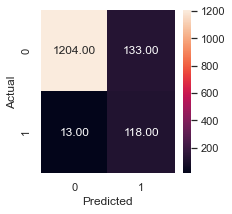

None 

Recall 90.08%
Precision 47.01%
F1 Score 61.78%
Roc Auc Score 90.06%

              [0.01, 0.1, 0.25, 0.5, 0.75, 1]
train_score:  [0.855, 0.896, 0.899, 0.899, 0.899, 0.899]
test_score:   [0.854, 0.896, 0.9, 0.901, 0.901, 0.901]


In [70]:
# Running a loop to check different values of 'C'
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    if (i == 0.5):
        print("0.5 has the highest accuracy:")
        eval_model(X_train,X_test,y_train,y_test,i,"MODEL 5")
print("\n             ",C)
print("train_score: ",train_score)
print("test_score:  ",test_score)

#### Best testing accuracy is obtained for C=0.5, though Recall is high, but the precision results only 37.2% and F1 Score is 53.16%. This will lead to higher incorrect results. Hence this model will be dropped

## The FINAL MODEL

## Based on the all above matrix, the best Final Model is with L1, Solver as liblinear and C set to 0.75

The Best Model with high accuracy and Precision%
************************  MODEL 3 (CHOSEN AS FINAL) **************************

Train score of the model is 95.97%
Test score of the model is 96.25%
[[1329    8]
 [  47   84]]

Accuracy for  L1/LIBLINEAR/BALANCED/0.75  96.25%
Trainig accuracy 95.91%
Testing accuracy 96.12%

Confusion Matrix


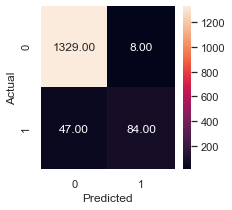

None 

Recall 64.12%
Precision 91.30%
F1 Score 75.34%
Roc Auc Score 81.76%


In [72]:
#Based on the all above matrix, the best Final Model is with L1, Solver as liblinear and treshold set to 0.75
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',C=0.75)  # changing values of C
model.fit(X_train, y_train) 
print("The Best Model with high accuracy and Precision%")
eval_model(X_train,X_test,y_train,y_test,"L1/LIBLINEAR/BALANCED/0.75","MODEL 3 (CHOSEN AS FINAL)")  

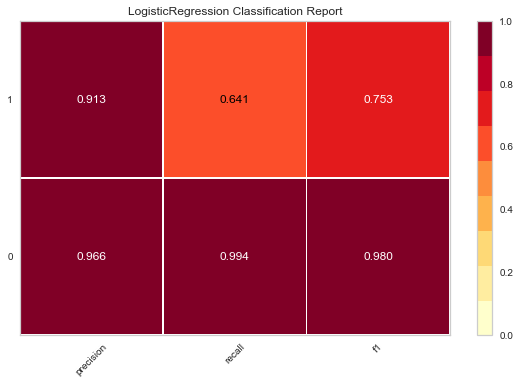

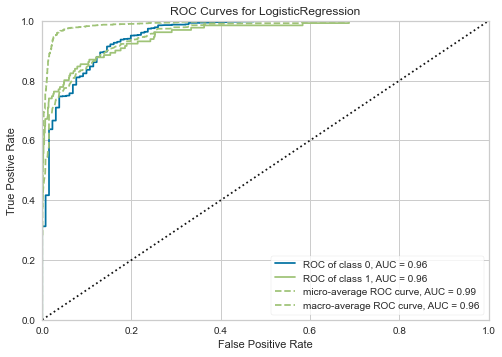

In [73]:
# !pip install yellowbrick - already executed, hence commented
from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 6. Give Business understanding of your model? (5 marks)

### Business Insight & Model Understanding

#### From the given data set, we can see that the majority of the data is collected for customers who has not accepted the Personnal loan offered by the bank and very few data contains those who have accepted the loan offered (480 out of 5000 which is 9.6%) and rejected was 4520, which 90.4%. So from this we can see that GIVEN DATASET is IMBALANCED. Hence, the model we have build should have (Higher Precision) a higher chance of perdicting those who will reject the loan than those who will accept the loans which we can see from the Confusion Matrix of Logistic Regression True Negative.
#### Since the bank dataset is imbalances, we need to evaluate the Precision-Recall measure of success of prediction. Precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

#### Applied the below principle to achieve the high precision and high recall  
- (a) A high recall but low precision returns postive results, but most of its predicted ones are incorrect when compared to the training. 
- (b) A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training. 

### The model is to the predict propensity (probability) of customers responding to a personal loan campaign. The goal is to build a model that identifies customers who are most likely to accept the loan offer in future personal loan campaigns with the minimum budget.
### Though, its important that the bank reachout to more customers to ensure not to missout any potential customer. But considering the risk of offering the loan to a customer who cannot pay back the interest or loan, the loss will be too high. Based on this understanding, the model is built to minise the Fase Positive.

#### Precision/Recall/F1. formulas for validation
- Precision (P) is defined as the number of true positives (Tp) over the number of true positives plus the number of false positives (Fp). P=Tp/Tp+Fp. 
-- 91.30% 
- Recall (R) is defined as the number of true positives (Tp) over the number of true positives plus the number of false negatives (Fn).R=Tp/Tp+Fn
-- 64.12% 
- These quantities are also related to the (F1) score, which is defined as the harmonic mean of precision and recall. F1=2(P×R)/(P+R)
-- 75.34%

#### The final model built which results in 
##### * True Positive (actual=1,predicted=1):
- Predicted that personal loan will be offered and the customer will accept the loan 
- We rightly predicted that 84 customers offered and accepted the loan 

##### * True Negative (actual=0,predicted=0): 
- Predicted that personal loan will not be offered and not a potential customer 
- We rightly predicted that 1329 customers not offered and not a pontential customer

##### * False Positive (actual=0,predicted=1): 
- Predicted that personal loan will be offered and the customer will not accept the loan 
- We wrongly predicted that 8 customers offered, but not potential customer. In this case, we kept the model to keep this risk to the minimum.

##### * False Negative (actual=1,predicted=0): 
- Predicted that personal loan will not be offered and but a potential customer who accept the loan 
- We wrongly predicted that 47 customers not eligible for loan, but they are potential customers. In this case, we may miss the potential customers.

### Conclusion:
Though MODEL 5 gives the highest opportunity to reachout to more customers (but, the precision was extremely low which means the results might have lots of false records), but due to the highrisk in the bank offering loan to customers who cannot pay, MODEL 3 was chosen as the final model.
Ultimately, this model helps the bank to identify the customers with the higher income and spending potentials who could repay the interest/loan (keeping minimum risk) who will most likely to accept the loan offer. 


# End of Project